# Check photometric results

In [30]:
import os 
from argparse import ArgumentParser as ap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
from astropy.io import fits as fits
import sep
from matplotlib.patches import Circle
from astroquery.jplhorizons import Horizons

from myplot import mycolor, mymark

%matplotlib inline

In [31]:
# Read photometric results

df_3I = pd.read_csv("../../data/photres_3I_mean_600s_20250715.txt", sep=" ")
df_ref_600 = pd.read_csv("../../data/photres_ref_mean_600s_20250715.txt", sep=" ")

df_P = pd.read_csv("../../data/photres_Popescu_mean_120s_20250715.txt", sep=" ")
df_ref_120 = pd.read_csv("../../data/photres_ref_mean_120s_20250715.txt", sep=" ")

In [32]:
# Remove some epochs 
# 3I =====================================
# Check frames
# g,r,i
frameid_list = sorted(list(set(df_3I.frameid)))
print(frameid_list)

# gri, 7th
df_3I = df_3I[df_3I.frameid != "gri7"]

# grz, 1st
df_3I = df_3I[df_3I.frameid != "grz1"]
# 3I =====================================

# Popescu ================================
# Check frames
# g,r,i 
frameid_list = sorted(list(set(df_P.frameid)))
print(frameid_list)

## gri 1st
#df_P = df_P[df_P.frameid != "gri1"]
## grz 1st
#df_P = df_P[df_P.frameid != "grz1"]
# Popescu ================================

['gri1', 'gri2', 'gri3', 'gri4', 'gri5', 'gri6', 'gri7', 'grz1', 'grz2', 'grz3', 'grz4', 'grz5']
['gri1', 'gri2', 'grz1', 'grz2']


In [33]:
# Check columns and objid
col = df_3I.columns.tolist()
print(col)
objid_list_120 = list(set(df_ref_120["target"]))
print(objid_list_120)

objid_list_600 = list(set(df_ref_600["target"]))
print(objid_list_600)

['Unnamed: 0', 'target', 'objtype', 'jd', 'band', 'frameid', 'radius', 'flux', 'fluxerr', 'instmag', 'instmagerr', 'elapsed_min']
[87412636249073504, 87422636240905378, 87442635742587845, 87392636681137829, 87402636116059815, 87422636034635175, 87392636229800487, 87442636694638890, 87382636803243435, 87412636663534771, 87452635996486099, 87432636946078105, 87432635775466650, 87452636116460862]
[85982636806130368, 85982636709472070, 85972637131924617, 85952637084765674, 85962637240119083, 85952636907932588, 85942637509846701, 85922637315970606, 85942637677608812, 85952637601954193, 85942637292657844, 85952637405239160, 85942637071877176, 85962637061808057, 85932637285411678]


In [34]:
# Solar colors in PS 
sunmag =  {
    "g":5.03,
    "r":4.64,
     "i":4.52,
     "z":4.51}

print(f"Sun")
for col in [("g", "r"), ("r", "i"), ("i", "z")]:
    b1, b2 = col
    sunmag1 = sunmag[b1]
    sunmag2 = sunmag[b2]
    print(f"  {b1}-{b2} = {sunmag1-sunmag2:.2f}")

Sun
  g-r = 0.39
  r-i = 0.12
  i-z = 0.01


In [13]:
# Check colors of PS stars
# Popescu 120 s
for objid in objid_list_120:
    df_t = df_ref_120[df_ref_120["target"] == objid]
    print(f"{objid}")

    for col in [("g", "r"), ("r", "i"), ("i", "z")]:
        b1, b2 = col
        df_b1 = df_t[df_t["band"] == b1]
        catmag1 = np.min(df_b1["PSmag"])
        df_b2 = df_t[df_t["band"] == b2]
        catmag2 = np.min(df_b2["PSmag"])
        print(f"  {b1}-{b2} = {catmag1-catmag2:.2f}")

87412636249073504
  g-r = 0.24
  r-i = 0.10
  i-z = 0.09
87422636240905378
  g-r = 0.82
  r-i = 0.40
  i-z = 0.22
87442635742587845
  g-r = 0.72
  r-i = 0.39
  i-z = 0.22
87392636681137829
  g-r = 0.79
  r-i = 0.37
  i-z = 0.21
87402636116059815
  g-r = 0.97
  r-i = 0.53
  i-z = 0.30
87422636034635175
  g-r = 0.73
  r-i = 0.38
  i-z = 0.20
87392636229800487
  g-r = 0.85
  r-i = 0.39
  i-z = 0.21
87442636694638890
  g-r = 0.81
  r-i = 0.48
  i-z = 0.24
87382636803243435
  g-r = 1.03
  r-i = 0.53
  i-z = 0.38
87412636663534771
  g-r = 0.94
  r-i = 0.48
  i-z = 0.29
87452635996486099
  g-r = 1.09
  r-i = 0.57
  i-z = 0.34
87432636946078105
  g-r = 0.77
  r-i = 0.40
  i-z = 0.22
87432635775466650
  g-r = 0.69
  r-i = 0.34
  i-z = 0.19
87452636116460862
  g-r = 0.97
  r-i = 0.46
  i-z = 0.25


In [35]:
# Check colors of PS stars
# 3I 600 s

for objid in objid_list_600:
    df_t = df_ref_600[df_ref_600["target"] == objid]
    print(f"{objid}")

    for col in [("g", "r"), ("r", "i"), ("i", "z")]:
        b1, b2 = col
        df_b1 = df_t[df_t["band"] == b1]
        catmag1 = np.min(df_b1["PSmag"])
        df_b2 = df_t[df_t["band"] == b2]
        catmag2 = np.min(df_b2["PSmag"])
        print(f"  {b1}-{b2} = {catmag1-catmag2:.2f}")


85982636806130368
  g-r = 0.98
  r-i = 0.52
  i-z = 0.30
85982636709472070
  g-r = 0.86
  r-i = 0.48
  i-z = 0.28
85972637131924617
  g-r = 0.71
  r-i = 0.35
  i-z = 0.21
85952637084765674
  g-r = 1.09
  r-i = 0.58
  i-z = 0.33
85962637240119083
  g-r = 1.04
  r-i = 0.52
  i-z = 0.31
85952636907932588
  g-r = 0.71
  r-i = 0.34
  i-z = 0.17
85942637509846701
  g-r = 0.99
  r-i = 0.46
  i-z = 0.34
85922637315970606
  g-r = 0.91
  r-i = 0.48
  i-z = 0.27
85942637677608812
  g-r = 0.95
  r-i = 0.49
  i-z = 0.30
85952637601954193
  g-r = 0.92
  r-i = 0.44
  i-z = 0.24
85942637292657844
  g-r = 1.06
  r-i = 0.53
  i-z = 0.29
85952637405239160
  g-r = 1.08
  r-i = 0.51
  i-z = 0.34
85942637071877176
  g-r = 0.68
  r-i = 0.32
  i-z = 0.18
85962637061808057
  g-r = 0.73
  r-i = 0.44
  i-z = 0.21
85932637285411678
  g-r = 1.03
  r-i = 0.57
  i-z = 0.31


## Growth curve 

In [36]:
radmax = 12

## 600 s

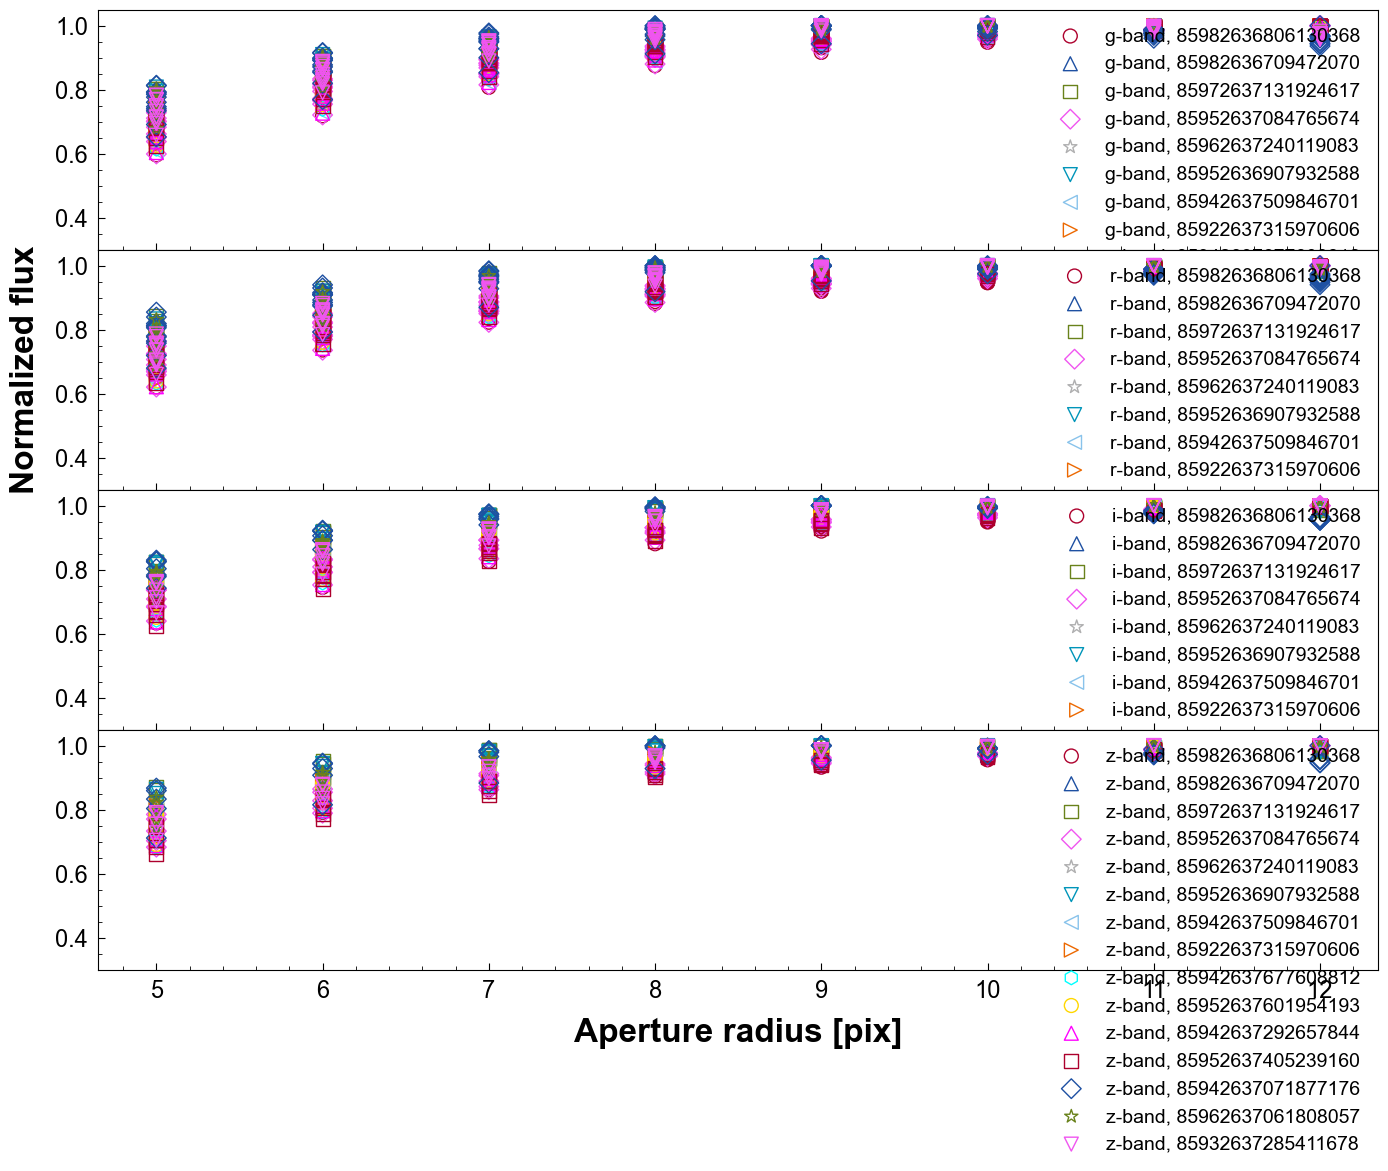

In [37]:
# Growth curve (reference stars)
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_axes([.1, .70, .8, .2])
ax2 = fig.add_axes([.1, .50, .8, .2])
ax3 = fig.add_axes([.1, .30, .8, .2])
ax4 = fig.add_axes([.1, .10, .8, .2])

ax2.set_ylabel("Normalized flux")
ax4.set_xlabel("Aperture radius [pix]")

axes = [ax1, ax2, ax3, ax4]
bands = ["g", "r", "i", "z"]


for idx_obj, objid in enumerate(objid_list_600):

    df_obj = df_ref_600[df_ref_600["target"] == objid]
    col = mycolor[idx_obj]
    mark = mymark[idx_obj]

    for idx_b, (b, ax) in enumerate(zip(bands, axes)):
        df_obj_b = df_obj[df_obj["band"] == b]


        for idx_jd, jd in enumerate(list(set(df_obj_b["jd"]))):
            # Extract 1 frame
            df_obj_b_jd = df_obj_b[df_obj_b["jd"] == jd]

            if idx_jd == 0:
                label = f"{b}-band, {objid}"
            else:
                label = None
        
            df_obj_b_jd = df_obj_b_jd[df_obj_b_jd["radius"] <= radmax]

            # Nromalize flux
            df_obj_b_jd["flux"] /= np.max(df_obj_b_jd["flux"])

            ax.scatter(df_obj_b_jd["radius"], df_obj_b_jd["flux"], color=col, label=label, marker=mark, s=100, facecolor="None")


for ax in axes:
    ax.legend()
    ax.set_ylim([0.3, 1.05])

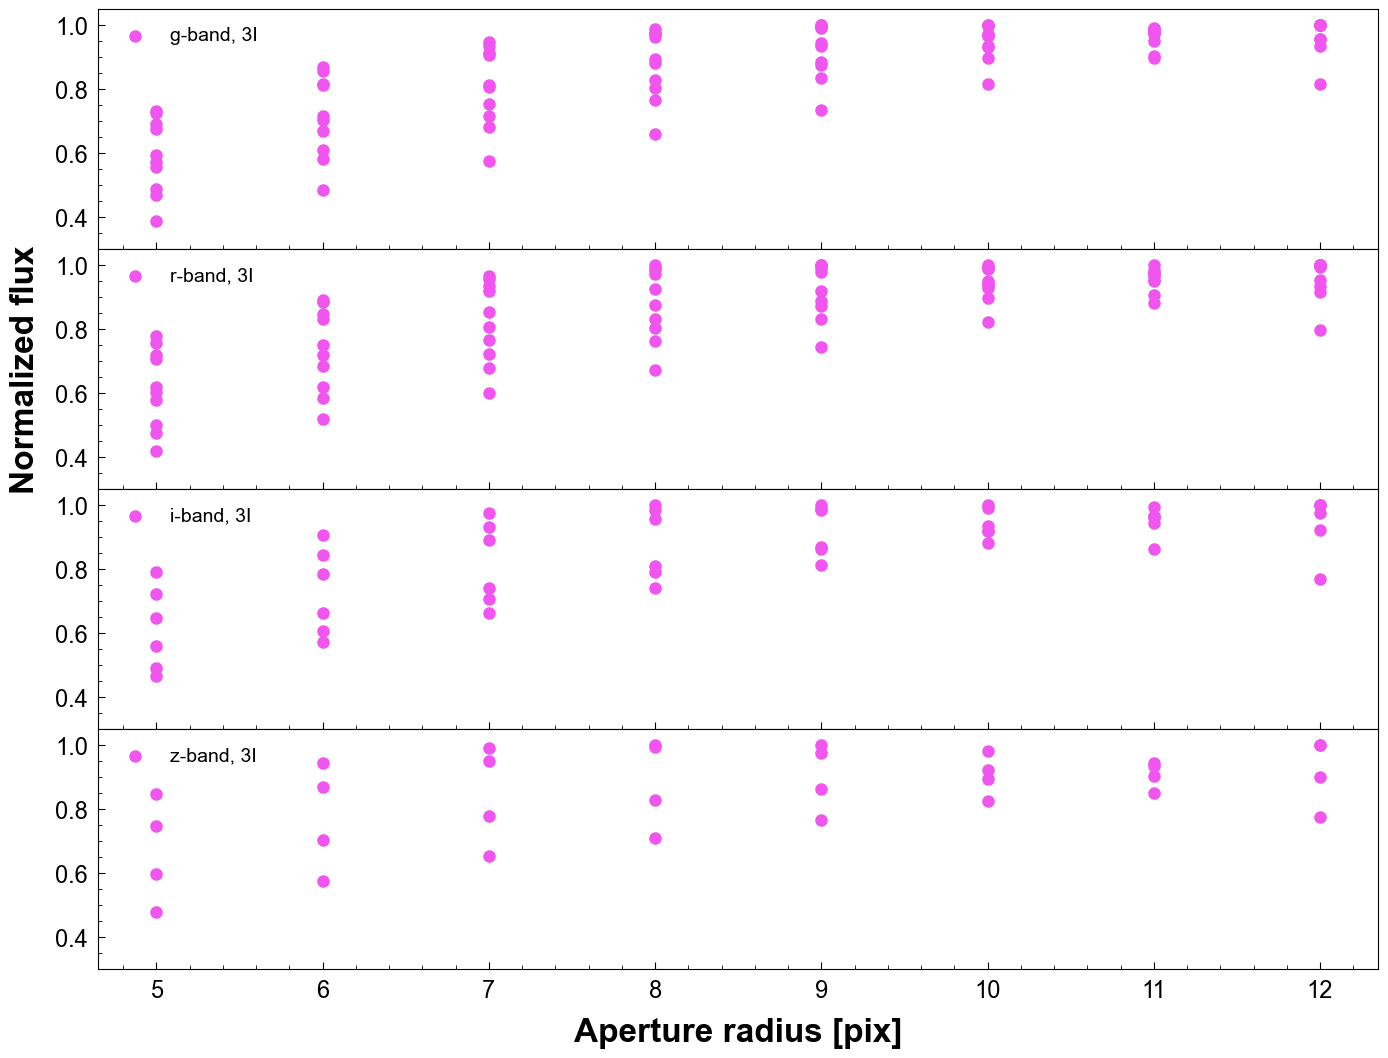

In [17]:
# Growth curve (3I)
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_axes([.1, .70, .8, .2])
ax2 = fig.add_axes([.1, .50, .8, .2])
ax3 = fig.add_axes([.1, .30, .8, .2])
ax4 = fig.add_axes([.1, .10, .8, .2])

ax2.set_ylabel("Normalized flux")
ax4.set_xlabel("Aperture radius [pix]")

axes = [ax1, ax2, ax3, ax4]
bands = ["g", "r", "i", "z"]


for b, ax in zip(bands, axes):
    df_3I_b = df_3I[df_3I["band"] == b]

    for idx_jd, jd in enumerate(list(set(df_3I_b["jd"]))):
        # Extract 1 frame
        df_3I_b_jd = df_3I_b[df_3I_b["jd"] == jd]

        if idx_jd == 0:
            label = f"{b}-band, 3I"
        else:
            label = None
        
        df_3I_b_jd = df_3I_b_jd[df_3I_b_jd["radius"] <= radmax]

        # Nromalize flux
        df_3I_b_jd["flux"] /= np.max(df_3I_b_jd["flux"])

        ax.scatter(df_3I_b_jd["radius"], df_3I_b_jd["flux"], color=col, label=label)

for ax in axes:
    ax.legend()
    ax.set_ylim([0.3, 1.05])

## 120 s

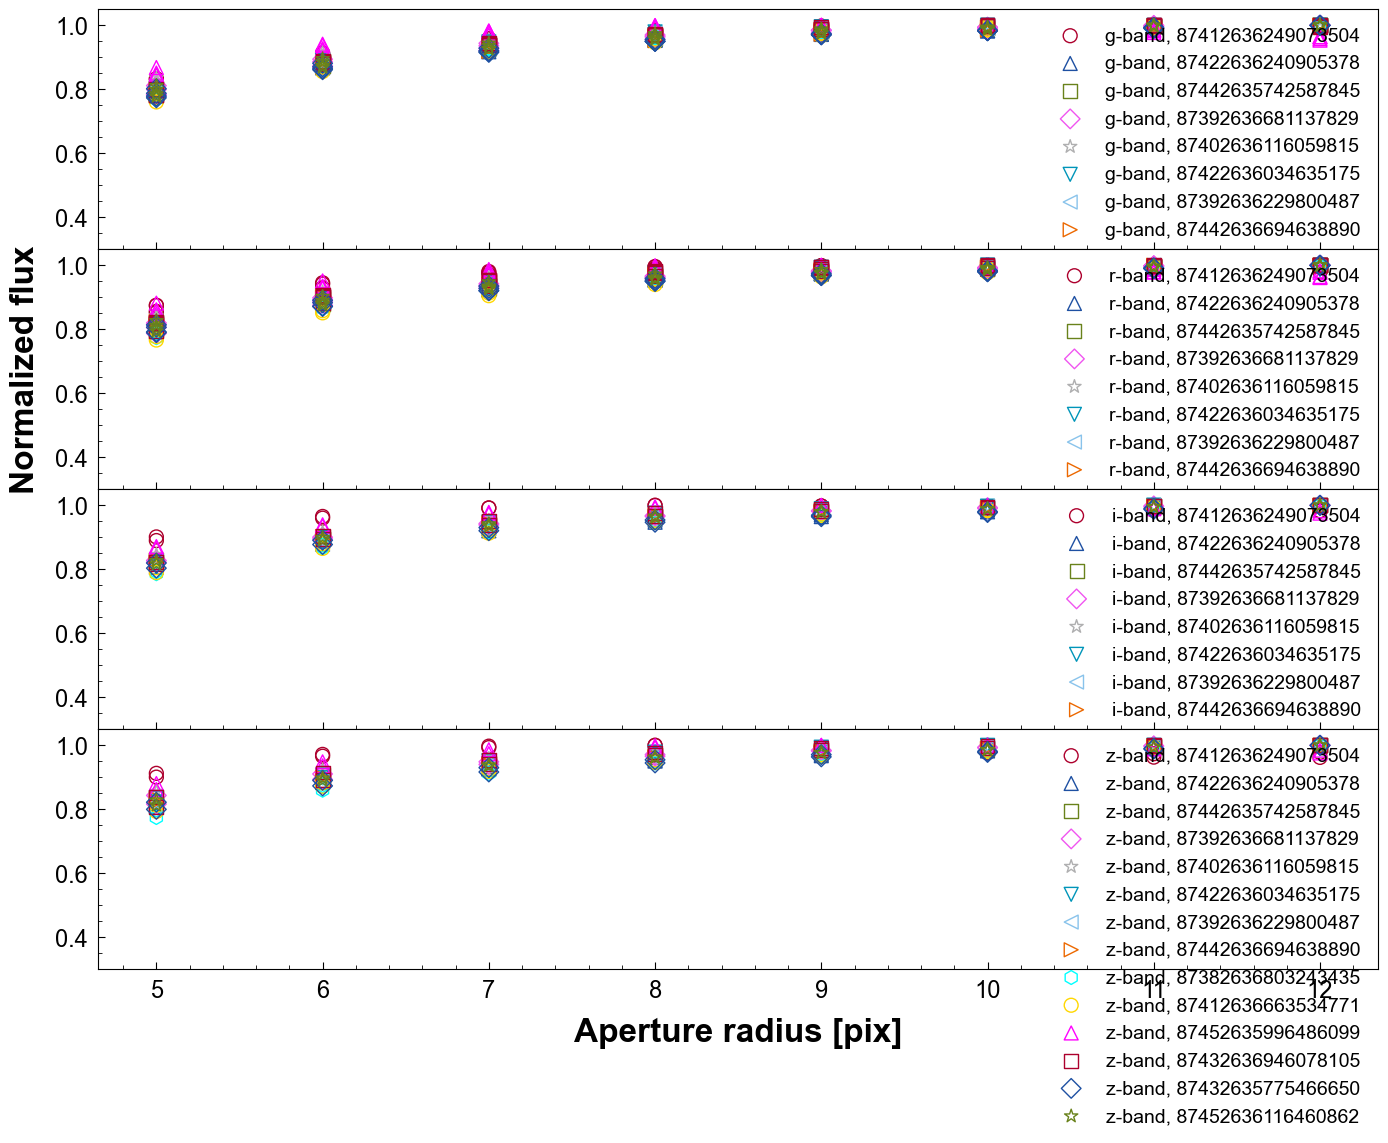

In [18]:
# Growth curve (reference stars)
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_axes([.1, .70, .8, .2])
ax2 = fig.add_axes([.1, .50, .8, .2])
ax3 = fig.add_axes([.1, .30, .8, .2])
ax4 = fig.add_axes([.1, .10, .8, .2])

ax2.set_ylabel("Normalized flux")
ax4.set_xlabel("Aperture radius [pix]")

axes = [ax1, ax2, ax3, ax4]
bands = ["g", "r", "i", "z"]


for idx_obj, objid in enumerate(objid_list_120):

    df_obj = df_ref_120[df_ref_120["target"] == objid]
    col = mycolor[idx_obj]
    mark = mymark[idx_obj]

    for idx_b, (b, ax) in enumerate(zip(bands, axes)):
        df_obj_b = df_obj[df_obj["band"] == b]


        for idx_jd, jd in enumerate(list(set(df_obj_b["jd"]))):
            # Extract 1 frame
            df_obj_b_jd = df_obj_b[df_obj_b["jd"] == jd]

            if idx_jd == 0:
                label = f"{b}-band, {objid}"
            else:
                label = None
        
            df_obj_b_jd = df_obj_b_jd[df_obj_b_jd["radius"] <= radmax]

            # Nromalize flux
            df_obj_b_jd["flux"] /= np.max(df_obj_b_jd["flux"])

            ax.scatter(df_obj_b_jd["radius"], df_obj_b_jd["flux"], color=col, label=label, marker=mark, s=100, facecolor="None")


for ax in axes:
    ax.legend()
    ax.set_ylim([0.3, 1.05])

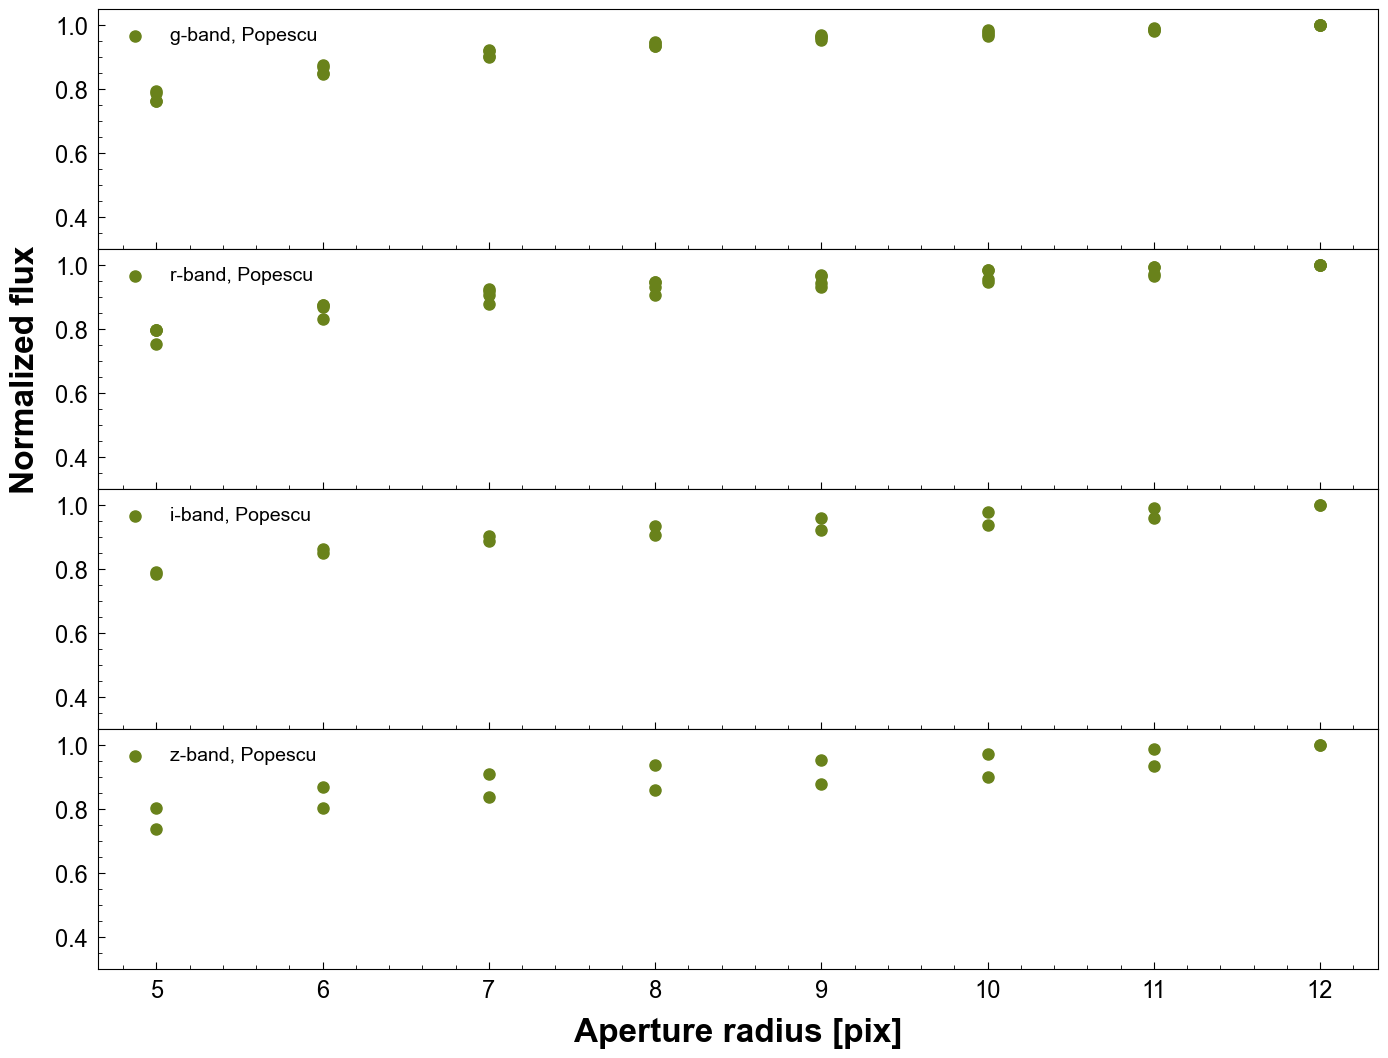

In [19]:
# Growth curve (Popescu)
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_axes([.1, .70, .8, .2])
ax2 = fig.add_axes([.1, .50, .8, .2])
ax3 = fig.add_axes([.1, .30, .8, .2])
ax4 = fig.add_axes([.1, .10, .8, .2])

ax2.set_ylabel("Normalized flux")
ax4.set_xlabel("Aperture radius [pix]")

axes = [ax1, ax2, ax3, ax4]
bands = ["g", "r", "i", "z"]


for b, ax in zip(bands, axes):
    df_P_b = df_P[df_P["band"] == b]

    for idx_jd, jd in enumerate(list(set(df_P_b["jd"]))):
        # Extract 1 frame
        df_P_b_jd = df_P_b[df_P_b["jd"] == jd]

        if idx_jd == 0:
            label = f"{b}-band, Popescu"
        else:
            label = None
          
        df_P_b_jd = df_P_b_jd[df_P_b_jd["radius"] <= radmax]

        # Nromalize flux
        df_P_b_jd["flux"] /= np.max(df_P_b_jd["flux"])

        ax.scatter(df_P_b_jd["radius"], df_P_b_jd["flux"], color=col, label=label)

for ax in axes:
    ax.legend()
    ax.set_ylim([0.3, 1.05])

# Determine zero point and magnitude

In [44]:
# Radius of reference stars and targets of interest
rad_ref, rad_tar = 12, 6

## Popsecu, 120 s

0       28.102306
1       28.202030
2       28.255549
3       28.282965
4       28.289603
          ...    
1339    27.192508
1340    27.216759
1341    27.230937
1342    27.240340
1343    27.247402
Name: magzpt, Length: 1344, dtype: float64
N_jd = 10
N_bands = 4
g-band
df_ref_b N=56
 {2460872.0424230476, 2460872.062813134, 2460872.040429648, 2460872.064877849}
  2460872.0424 magzpt = 28.235277475335465+-0.0677718635080241
  2460872.0649 magzpt = 28.175891921829+-0.0717413850304595
  2460872.0404 magzpt = 28.21843748624493+-0.06409193869743833
  2460872.0628 magzpt = 28.184456580727964+-0.06482887436904577
r-band
df_ref_b N=56
 {2460872.042420526, 2460872.062813134, 2460872.0404272433, 2460872.064877849}
  2460872.0649 magzpt = 27.778677716791428+-0.048590738494970316
  2460872.0424 magzpt = 27.818479784557383+-0.059475521883567604
  2460872.0404 magzpt = 27.794948809353016+-0.05598241615833523
  2460872.0628 magzpt = 27.78066745339306+-0.048294390410194815
i-band
df_ref_b N=28
 {246087

/var/folders/xv/z4qp4sf50z10cwc8tgxysssw0000gn/T/ipykernel_93388/708864793.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


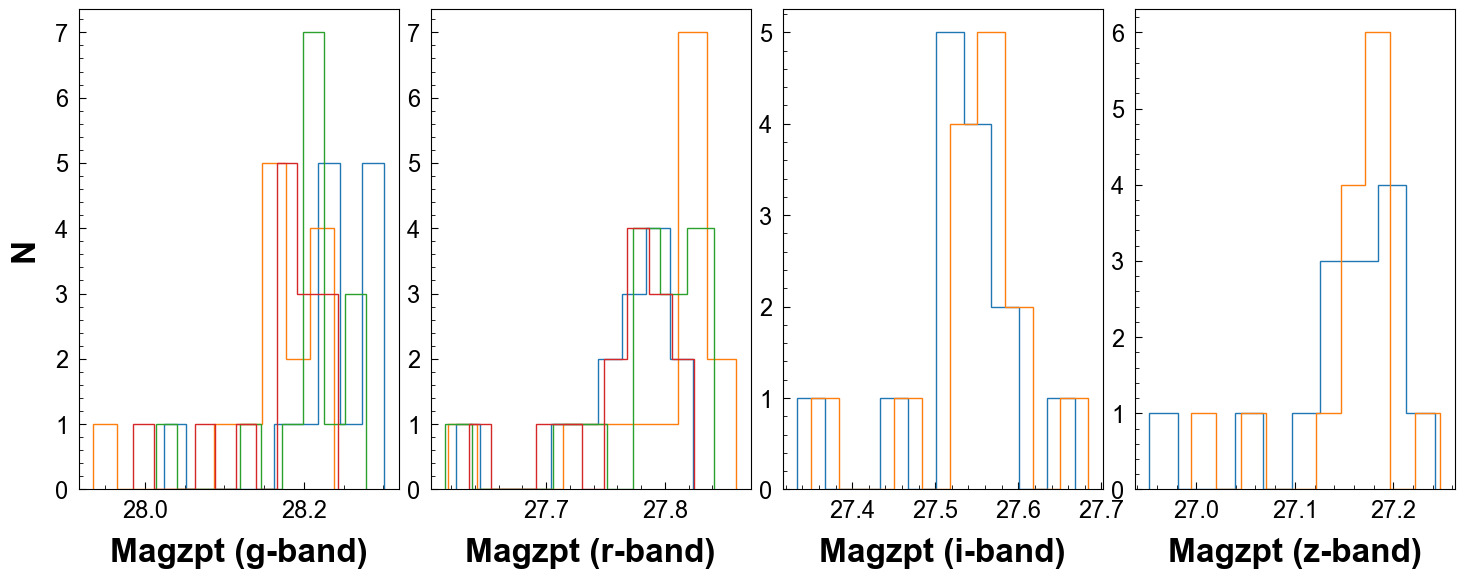

In [45]:
# magzpt = PSmag - instmag
df_ref_120["magzpt"] =  df_ref_120["PSmag"] - df_ref_120["instmag"]
print(df_ref_120["magzpt"])

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_axes([.1, .1, .2, .8])
ax2 = fig.add_axes([.32, .1, .2, .8])
ax3 = fig.add_axes([.54, .1, .2, .8])
ax4 = fig.add_axes([.76, .1, .2, .8])

ax1.set_ylabel("N")
ax1.set_xlabel("Magzpt (g-band)")
ax2.set_xlabel("Magzpt (r-band)")
ax3.set_xlabel("Magzpt (i-band)")
ax4.set_xlabel("Magzpt (z-band)")

axes = [ax1, ax2, ax3, ax4]
bands = ["g", "r", "i", "z"]

df_ref_r = df_ref_120[df_ref_120["radius"] == rad_ref]

df_magzpt_list = []

# Need to do this here due to "hop" erorr.
jd_list = list(set(df_ref_r.jd))
N_jd = len(jd_list)
print(f"N_jd = {N_jd}")

print(f"N_bands = {len(bands)}")

for idx_b, (b, ax) in enumerate(zip(bands, axes)):
    df_ref_b = df_ref_r[df_ref_r["band"] == b]
    print(f"{b}-band")
    print(f"df_ref_b N={len(df_ref_b)}")   
    print(f" {set(df_ref_b.jd)}") 
  
    for idx_jd, jd in enumerate(jd_list):
        label = None
        df_t = df_ref_b[df_ref_b["jd"] == jd]
        if len(df_t) == 0:
            continue
        ax.hist(df_t["magzpt"], label=label, histtype="step")
        magzpt, magzpterr = np.median(df_t["magzpt"]), np.std(df_t["magzpt"])
        print(f"  {jd:.4f} magzpt = {magzpt}+-{magzpterr}")

        frameid = df_t.frameid.values.tolist()[0]
        
        # Make a dataframe
        df_magzpt = pd.DataFrame({"jd": [jd], "band": [b], "magzpt": [magzpt], "magzpterr":[magzpterr], "frameid": [frameid]})
        df_magzpt_list.append(df_magzpt)


for ax in axes:
    #ax.set_ylim([0, 10])
    ax.legend()


df_magzpt_120 = pd.concat(df_magzpt_list)


g-band N_jd = 4
  magzpt = 28.24+-0.07
  instmag = -11.38+-0.01
  corrected mag = 16.86+-0.07
  magzpt = 28.18+-0.06
  instmag = -11.30+-0.01
  corrected mag = 16.88+-0.07
  magzpt = 28.22+-0.06
  instmag = -11.33+-0.01
  corrected mag = 16.89+-0.06
  magzpt = 28.18+-0.07
  instmag = -11.28+-0.01
  corrected mag = 16.89+-0.07
r-band N_jd = 4
  magzpt = 27.82+-0.06
  instmag = -11.50+-0.01
  corrected mag = 16.32+-0.06
  magzpt = 27.78+-0.05
  instmag = -11.46+-0.01
  corrected mag = 16.32+-0.05
  magzpt = 27.79+-0.06
  instmag = -11.46+-0.01
  corrected mag = 16.33+-0.06
  magzpt = 27.78+-0.05
  instmag = -11.44+-0.01
  corrected mag = 16.34+-0.05
i-band N_jd = 2
  magzpt = 27.56+-0.07
  instmag = -11.40+-0.01
  corrected mag = 16.16+-0.07
  magzpt = 27.54+-0.07
  instmag = -11.37+-0.01
  corrected mag = 16.16+-0.07
z-band N_jd = 2
  magzpt = 27.17+-0.07
  instmag = -10.99+-0.01
  corrected mag = 16.17+-0.07
  magzpt = 27.17+-0.06
  instmag = -11.00+-0.01
  corrected mag = 16.17+-0.06


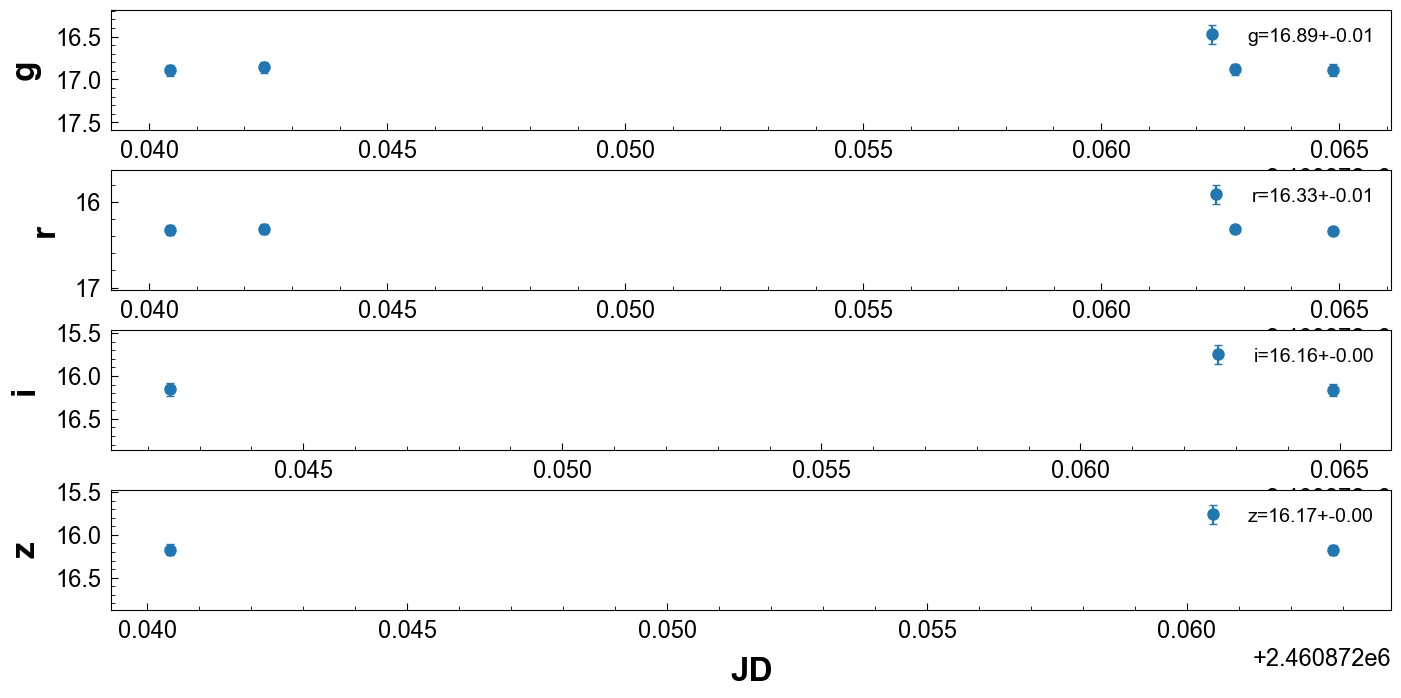

In [46]:
# Plot corrected lightcurves of Popsecu
df_P_rad = df_P[df_P["radius"] == rad_tar]

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_axes([.1, .75, .8, .15])
ax2 = fig.add_axes([.1, .55, .8, .15])
ax3 = fig.add_axes([.1, .35, .8, .15])
ax4 = fig.add_axes([.1, .15, .8, .15])

ax1.set_ylabel("g")
ax2.set_ylabel("r")
ax3.set_ylabel("i")
ax4.set_ylabel("z")
ax4.set_xlabel("JD")
wid = 0.7
gmax, rmax, imax, zmax = 18.5, 18, 18, 18
ax1.set_ylim([gmax, gmax-1])
ax2.set_ylim([rmax, rmax-1])
ax3.set_ylim([imax, imax-1])
ax4.set_ylim([zmax, zmax-1])

bands = ["g", "r", "i", "z"]
axes = [ax1, ax2, ax3, ax4]



for ax, band in zip(axes, bands):

    df_P_b = df_P_rad[df_P_rad["band"] == band]
    df_magzpt_b = df_magzpt_120[df_magzpt_120["band"] == band]


    jd_list = list(set(df_P_b.jd))
    N_jd = len(jd_list)
    print(f"{band}-band N_jd = {N_jd}")

    mag_list, magerr_list = [], []
    for jd in jd_list:

        # Get magzpt 
        magzpt = df_magzpt_b[df_magzpt_b["jd"] == jd]["magzpt"][0]
        magzpterr = df_magzpt_b[df_magzpt_b["jd"] == jd]["magzpterr"][0]
        print(f"  magzpt = {magzpt:.2f}+-{magzpterr:.2f}")

        # Inst mag
        instmag = df_P_b[df_P_b["jd"] == jd]["instmag"].values.tolist()[0]
        instmagerr = df_P_b[df_P_b["jd"] == jd]["instmagerr"].values.tolist()[0]

        print(f"  instmag = {instmag:.2f}+-{instmagerr:.2f}")
        # Calculate corrected magnitude 
        # mag = instmag + magzpt
        mag_cor = instmag + magzpt
        magerr_cor = (instmagerr**2 + magzpterr**2)**0.5
        print(f"  corrected mag = {mag_cor:.2f}+-{magerr_cor:.2f}")

        mag_list.append(mag_cor)
        magerr_list.append(magerr_cor)

    mag_med, mag_std = np.median(mag_list), np.std(mag_list)
    label = f"{band}={mag_med:.2f}+-{mag_std:.2f}"
    ax.errorbar(jd_list, mag_list, magerr_list, label=label, fmt="o")
    ax.legend()
    ax.set_ylim([mag_med + wid, mag_med - wid])
    if band == "g":
        gmag = mag_med
        gmagerr = mag_std
    elif band == "r":
        rmag = mag_med
        rmagerr = mag_std
    elif band == "i":
        imag = mag_med
        imagerr = mag_std
    elif band == "z":
        zmag = mag_med
        zmagerr = mag_std
    
# Colors
g_r, g_rerr = gmag - rmag, (gmagerr**2 + rmagerr**2)**0.5
r_i, r_ierr = rmag - imag, (rmagerr**2 + imagerr**2)**0.5
g_i, g_ierr = gmag - imag, (gmagerr**2 + imagerr**2)**0.5
r_z, r_zerr = rmag - zmag, (rmagerr**2 + zmagerr**2)**0.5
i_z, i_zerr = imag - zmag, (imagerr**2 + zmagerr**2)**0.5

print(f" g-r = {g_r:.3f}+-{g_rerr:.3f}")
print(f" r-i = {r_i:.3f}+-{r_ierr:.3f}")
print(f" g-i = {g_i:.3f}+-{g_ierr:.3f}")
print(f" r-z = {r_z:.3f}+-{r_zerr:.3f}")
print(f" i-z = {i_z:.3f}+-{i_zerr:.3f}")


## 3I

0       27.779202
1       27.929232
2       28.015186
3       28.065351
4       28.097482
          ...    
4315    26.956793
4316    26.966951
4317    26.964791
4318    26.960006
4319    26.954856
Name: magzpt, Length: 4320, dtype: float64
N_jd = 35
N_bands = 4
g-band
df_ref_b N=180
 {2460872.0262844786, 2460872.1134525007, 2460872.106472954, 2460872.071512806, 2460872.0486847195, 2460872.120429576, 2460872.1294925483, 2460872.0350378333, 2460872.057324158, 2460872.0800687335, 2460872.08970752, 2460872.096685419}
  2460872.0263 magzpt = 28.148551276336338+-0.04742469344179765
  2460872.0487 magzpt = 28.12595253828374+-0.04886492181586271
  2460872.0715 magzpt = 28.069490603627614+-0.057766661025255774
  2460872.1065 magzpt = 28.178672880969618+-0.05757223266982046
  2460872.1135 magzpt = 28.10606051674975+-0.06726251809868192
  2460872.1204 magzpt = 28.138906035843164+-0.06490049260062232
  2460872.0897 magzpt = 28.11893868736498+-0.06375739045218944
  2460872.0967 magzpt = 28.1156431

/var/folders/xv/z4qp4sf50z10cwc8tgxysssw0000gn/T/ipykernel_93388/3262604210.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


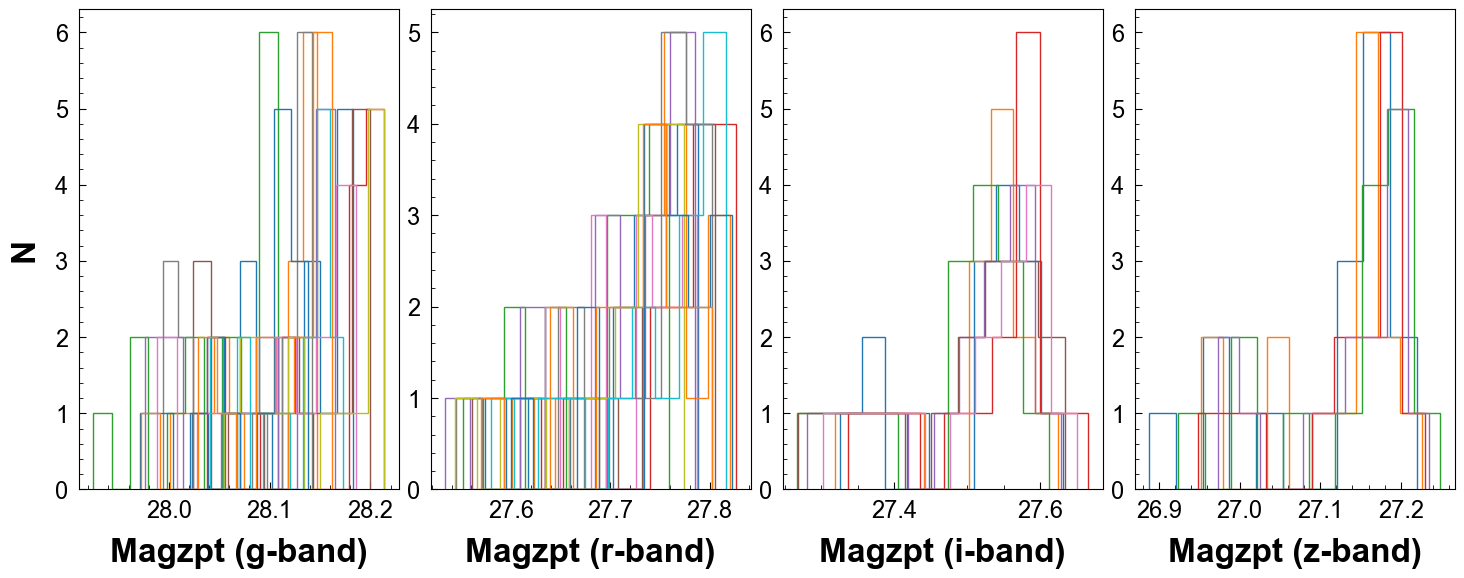

In [47]:
# magzpt = PSmag - instmag
df_ref_600["magzpt"] =  df_ref_600["PSmag"] - df_ref_600["instmag"]
print(df_ref_600["magzpt"])

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_axes([.1, .1, .2, .8])
ax2 = fig.add_axes([.32, .1, .2, .8])
ax3 = fig.add_axes([.54, .1, .2, .8])
ax4 = fig.add_axes([.76, .1, .2, .8])

ax1.set_ylabel("N")
ax1.set_xlabel("Magzpt (g-band)")
ax2.set_xlabel("Magzpt (r-band)")
ax3.set_xlabel("Magzpt (i-band)")
ax4.set_xlabel("Magzpt (z-band)")

axes = [ax1, ax2, ax3, ax4]
bands = ["g", "r", "i", "z"]

df_ref_r = df_ref_600[df_ref_600["radius"] == rad_ref]

df_magzpt_list = []

# Need to do this here due to "hop" erorr.
jd_list = list(set(df_ref_r.jd))
N_jd = len(jd_list)
print(f"N_jd = {N_jd}")

print(f"N_bands = {len(bands)}")

for idx_b, (b, ax) in enumerate(zip(bands, axes)):
    df_ref_b = df_ref_r[df_ref_r["band"] == b]
    print(f"{b}-band")
    print(f"df_ref_b N={len(df_ref_b)}")   
    print(f" {set(df_ref_b.jd)}") 
  
    for idx_jd, jd in enumerate(jd_list):
        label = None
        df_t = df_ref_b[df_ref_b["jd"] == jd]
        if len(df_t) == 0:
            continue
        ax.hist(df_t["magzpt"], label=label, histtype="step")
        magzpt, magzpterr = np.median(df_t["magzpt"]), np.std(df_t["magzpt"])
        print(f"  {jd:.4f} magzpt = {magzpt}+-{magzpterr}")

        frameid = df_t.frameid.values.tolist()[0]

        # Make a dataframe
        df_magzpt = pd.DataFrame({"jd": [jd], "band": [b], "magzpt": [magzpt], "magzpterr":[magzpterr], "frameid": [frameid]})
        df_magzpt_list.append(df_magzpt)


for ax in axes:
    #ax.set_ylim([0, 10])
    ax.legend()


df_magzpt_600 = pd.concat(df_magzpt_list)


2460872.0263
  magzpt = 28.15+-0.05
  instmag = -9.56+-0.02
  corrected mag = 18.59+-0.05
2460872.0487
  magzpt = 28.13+-0.05
  instmag = -9.50+-0.02
  corrected mag = 18.62+-0.05
2460872.0573
  magzpt = 28.11+-0.05
  instmag = -9.51+-0.02
  corrected mag = 18.59+-0.06
2460872.0715
  magzpt = 28.07+-0.06
  instmag = -9.69+-0.02
  corrected mag = 18.38+-0.06
2460872.0801
  magzpt = 28.13+-0.05
  instmag = -9.49+-0.03
  corrected mag = 18.64+-0.06
2460872.0897
  magzpt = 28.12+-0.06
  instmag = -9.61+-0.02
  corrected mag = 18.51+-0.07
2460872.0967
  magzpt = 28.12+-0.06
  instmag = -9.44+-0.03
  corrected mag = 18.68+-0.06
2460872.1065
  magzpt = 28.18+-0.06
  instmag = -9.56+-0.02
  corrected mag = 18.61+-0.06
2460872.1135
  magzpt = 28.11+-0.07
  instmag = -9.75+-0.02
  corrected mag = 18.35+-0.07
2460872.1204
  magzpt = 28.14+-0.06
  instmag = -9.46+-0.03
  corrected mag = 18.68+-0.07
2460872.0263
  magzpt = 27.76+-0.06
  instmag = -9.82+-0.02
  corrected mag = 17.95+-0.06
2460872.04

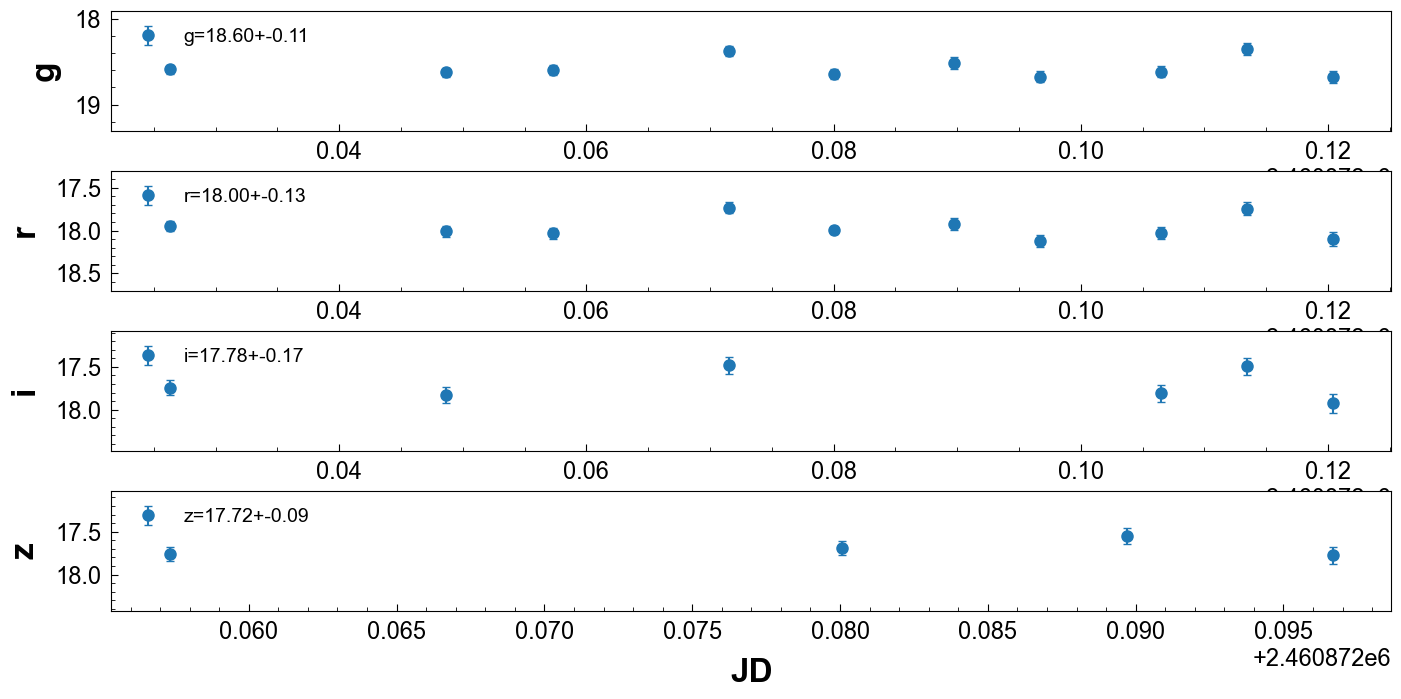

In [48]:
# Plot corrected lightcurves of 3I 
df_3I_rad = df_3I[df_3I["radius"] == rad_tar]

df_list = []

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_axes([.1, .75, .8, .15])
ax2 = fig.add_axes([.1, .55, .8, .15])
ax3 = fig.add_axes([.1, .35, .8, .15])
ax4 = fig.add_axes([.1, .15, .8, .15])

ax1.set_ylabel("g")
ax2.set_ylabel("r")
ax3.set_ylabel("i")
ax4.set_ylabel("z")
ax4.set_xlabel("JD")
wid = 0.7
gmax, rmax, imax, zmax = 18.5, 18, 18, 18
ax1.set_ylim([gmax, gmax-1])
ax2.set_ylim([rmax, rmax-1])
ax3.set_ylim([imax, imax-1])
ax4.set_ylim([zmax, zmax-1])

bands = ["g", "r", "i", "z"]
axes = [ax1, ax2, ax3, ax4]

for ax, band in zip(axes, bands):
    df_3I_b = df_3I_rad[df_3I_rad["band"] == band]
    df_magzpt_b = df_magzpt_600[df_magzpt_600["band"] == band]
    jd_list = sorted(list(set(df_3I_b.jd)))
    mag_list, magerr_list, frameid_list = [], [], []
    for jd in jd_list:
        print(f"{jd:.4f}")
        # Get magzpt 
        magzpt = df_magzpt_b[df_magzpt_b["jd"] == jd]["magzpt"][0]
        magzpterr = df_magzpt_b[df_magzpt_b["jd"] == jd]["magzpterr"][0]
        print(f"  magzpt = {magzpt:.2f}+-{magzpterr:.2f}")

        # Inst mag
        instmag = df_3I_b[df_3I_b["jd"] == jd]["instmag"].values.tolist()[0]
        instmagerr = df_3I_b[df_3I_b["jd"] == jd]["instmagerr"].values.tolist()[0]
        
        print(f"  instmag = {instmag:.2f}+-{instmagerr:.2f}")
        # Calculate corrected magnitude 
        # mag = instmag + magzpt
        mag_cor = instmag + magzpt
        magerr_cor = (instmagerr**2 + magzpterr**2)**0.5
        print(f"  corrected mag = {mag_cor:.2f}+-{magerr_cor:.2f}")

        mag_list.append(mag_cor)
        magerr_list.append(magerr_cor)
        frameid = df_3I_b[df_3I_b["jd"] == jd]["frameid"].values.tolist()[0]
        frameid_list.append(frameid)
    
    df_b = pd.DataFrame(dict(jd=jd_list, mag=mag_list, magerr=magerr_list, frameid=frameid_list))
    df_b["band"] = band
    df_list.append(df_b)
    mag_med, mag_std = np.median(mag_list), np.std(mag_list)
    label = f"{band}={mag_med:.2f}+-{mag_std:.2f}"
    ax.errorbar(jd_list, mag_list, magerr_list, label=label, fmt="o")
    ax.legend()
    ax.set_ylim([mag_med + wid, mag_med - wid])
    if band == "g":
        gmag = mag_med
        gmagerr = mag_std
    elif band == "r":
        rmag = mag_med
        rmagerr = mag_std
    elif band == "i":
        imag = mag_med
        imagerr = mag_std
    elif band == "z":
        zmag = mag_med
        zmagerr = mag_std
    

df_mag = pd.concat(df_list)
# Save as a final mag
out = "/Users/beniyama/research/Seimei_3I/paper/data/mag_3I_20250715.txt"
df_mag.to_csv(out, sep=" ", index=False)


# Colors
g_r, g_rerr = gmag - rmag, (gmagerr**2 + rmagerr**2)**0.5
r_i, r_ierr = rmag - imag, (rmagerr**2 + imagerr**2)**0.5
g_i, g_ierr = gmag - imag, (gmagerr**2 + imagerr**2)**0.5
r_z, r_zerr = rmag - zmag, (rmagerr**2 + zmagerr**2)**0.5
i_z, i_zerr = imag - zmag, (imagerr**2 + zmagerr**2)**0.5

print(f" g-r = {g_r:.2f}+-{g_rerr:.2f}")
print(f" r-i = {r_i:.2f}+-{r_ierr:.2f}")
print(f" g-i = {g_i:.2f}+-{g_ierr:.2f}")
print(f" r-z = {r_z:.2f}+-{r_zerr:.2f}")
print(f" i-z = {i_z:.2f}+-{i_zerr:.2f}")


# Colors of 3I and Popescu

In [25]:
# Calculate corrected magnitude of 3I
def calc_col(df, df_magzpt, rad_tar):
    # Add column
    df["mag_cor"] = 0.0
    df["magerr_cor"] = 0.0

    df_rad = df[df["radius"] == rad_tar].copy()

    bands = ["g", "r", "i", "z"]

    frameid_list = sorted(list(set(df.frameid)))

    g_r_list, g_rerr_list, r_i_list, r_ierr_list, r_z_list, r_zerr_list = [], [], [], [], [], []
    for frameid in frameid_list:

        if frameid[0:3] == "gri":
            b1, b2, b3 = "g", "r", "i"
        elif frameid[0:3] == "grz":
            b1, b2, b3 = "g", "r", "z"

        mag_list, magerr_list = [], []
        for b in [b1, b2, b3]:
            df_b = df_rad[(df_rad["frameid"] == frameid) & (df_rad["band"] == b)]

            df_magzpt_b = df_magzpt[(df_magzpt["frameid"] == frameid) & (df_magzpt["band"] == b)]

            magzpt = df_magzpt_b["magzpt"][0]
            magzpterr = df_magzpt_b["magzpterr"][0]

            # Inst mag
            instmag = df_b["instmag"].values.tolist()[0]
            instmagerr = df_b["instmagerr"].values.tolist()[0]
            #print(f"  instmag = {instmag:.2f}+-{instmagerr:.2f}")

            # Calculate corrected magnitude 
            # mag = instmag + magzpt
            mag_cor = instmag + magzpt
            magerr_cor = (instmagerr**2 + magzpterr**2)**0.5
            #print(f"  corrected mag = {mag_cor:.2f}+-{magerr_cor:.2f}")

            mag_list.append(mag_cor)
            magerr_list.append(magerr_cor)
        # Calculate colors
        if frameid[0:3] == "gri":
            g_r_list.append(mag_list[0]-mag_list[1])
            g_rerr = (magerr_list[0]**2 + magerr_list[1]**2)**0.5
            g_rerr_list.append(g_rerr)
        
            r_i_list.append(mag_list[1]-mag_list[2])
            r_ierr = (magerr_list[1]**2 + magerr_list[2]**2)**0.5
            r_ierr_list.append(r_ierr)

        elif frameid[0:3] == "grz":
            b1, b2, b3 = "g", "r", "z"
            g_r_list.append(mag_list[0]-mag_list[1])
            g_rerr = (magerr_list[0]**2 + magerr_list[1]**2)**0.5
            g_rerr_list.append(g_rerr)
        
            r_z_list.append(mag_list[1]-mag_list[2])
            r_zerr = (magerr_list[1]**2 + magerr_list[2]**2)**0.5
            r_zerr_list.append(r_zerr)

    
    return g_r_list, g_rerr_list, r_i_list, r_ierr_list, r_z_list, r_zerr_list




def rad_col(df, df_magzpt, rad_list, width=0.2):
    gr_list, ri_list, rz_list = [], [], []
    grerr_list, rierr_list, rzerr_list = [], [], []
    for r in rad_list:
        g_r_list, g_rerr_list, r_i_list, r_ierr_list, r_z_list, r_zerr_list = calc_col(df, df_magzpt, r)

        # Calculate median and std
        g_r, g_rerr = np.median(g_r_list), np.std(g_r_list)
        r_i, r_ierr = np.median(r_i_list), np.std(r_i_list)
        r_z, r_zerr = np.median(r_z_list), np.std(r_z_list)
        
        print(f"rad = {r}")
        print(f" g-r = {g_r:.3f}+-{g_rerr:.3f}")
        print(f" r-i = {r_i:.3f}+-{r_ierr:.3f}")
        print(f" r-z = {r_z:.3f}+-{r_zerr:.3f}")
        print()

        gr_list.append(g_r)
        ri_list.append(r_i)
        rz_list.append(r_z)

        grerr_list.append(g_rerr)
        rierr_list.append(r_ierr)
        rzerr_list.append(r_zerr)

    # Plot 
    fig = plt.figure(figsize=(16, 6))
    ax1 = fig.add_axes([0.1, 0.1, 0.25, 0.8])
    ax2 = fig.add_axes([0.4, 0.1, 0.25, 0.8])
    ax3 = fig.add_axes([0.7, 0.1, 0.25, 0.8])

    ax1.set_xlabel("Aperture radius [pix]")
    ax2.set_xlabel("Aperture radius [pix]")
    ax3.set_xlabel("Aperture radius [pix]")

    ax1.set_ylabel("Color [mag]")

    ax1.errorbar(rad_list, gr_list, grerr_list, label="g-r")
    ax2.errorbar(rad_list, ri_list, rierr_list, label="r-i")
    ax3.errorbar(rad_list, rz_list, rzerr_list, label="r-z")


    for ax in [ax1, ax2, ax3]:
        ymin, ymax = ax.get_ylim()
        ymean = (ymin + ymax)/2
        ymin1 = ymean + 0.5*width
        ymax1 = ymean - 0.5*width
        ax.set_ylim([ymin1, ymax1])

    ax1.legend()
    ax2.legend()
    ax3.legend()

    df_col = pd.DataFrame(dict(
        radius=rad_list, 
        g_r=gr_list, g_rerr=grerr_list,
        r_i=ri_list, r_ierr=rierr_list,
        r_z=rz_list, r_zerr=rzerr_list,
        ))
    return df_col

rad = 5
 g-r = 0.566+-0.006
 r-i = 0.176+-0.010
 r-z = 0.169+-0.007

rad = 6
 g-r = 0.555+-0.008
 r-i = 0.170+-0.009
 r-z = 0.153+-0.006

rad = 7
 g-r = 0.545+-0.010
 r-i = 0.167+-0.007
 r-z = 0.145+-0.004

rad = 8
 g-r = 0.542+-0.011
 r-i = 0.167+-0.011
 r-z = 0.141+-0.001

rad = 9
 g-r = 0.541+-0.014
 r-i = 0.173+-0.014
 r-z = 0.138+-0.001

rad = 10
 g-r = 0.542+-0.016
 r-i = 0.176+-0.013
 r-z = 0.141+-0.001

rad = 11
 g-r = 0.545+-0.018
 r-i = 0.182+-0.011
 r-z = 0.156+-0.005

rad = 12
 g-r = 0.552+-0.023
 r-i = 0.189+-0.006
 r-z = 0.177+-0.021

rad = 6
 g-r = 0.555+-0.008
 r-i = 0.170+-0.009
 r-z = 0.153+-0.006


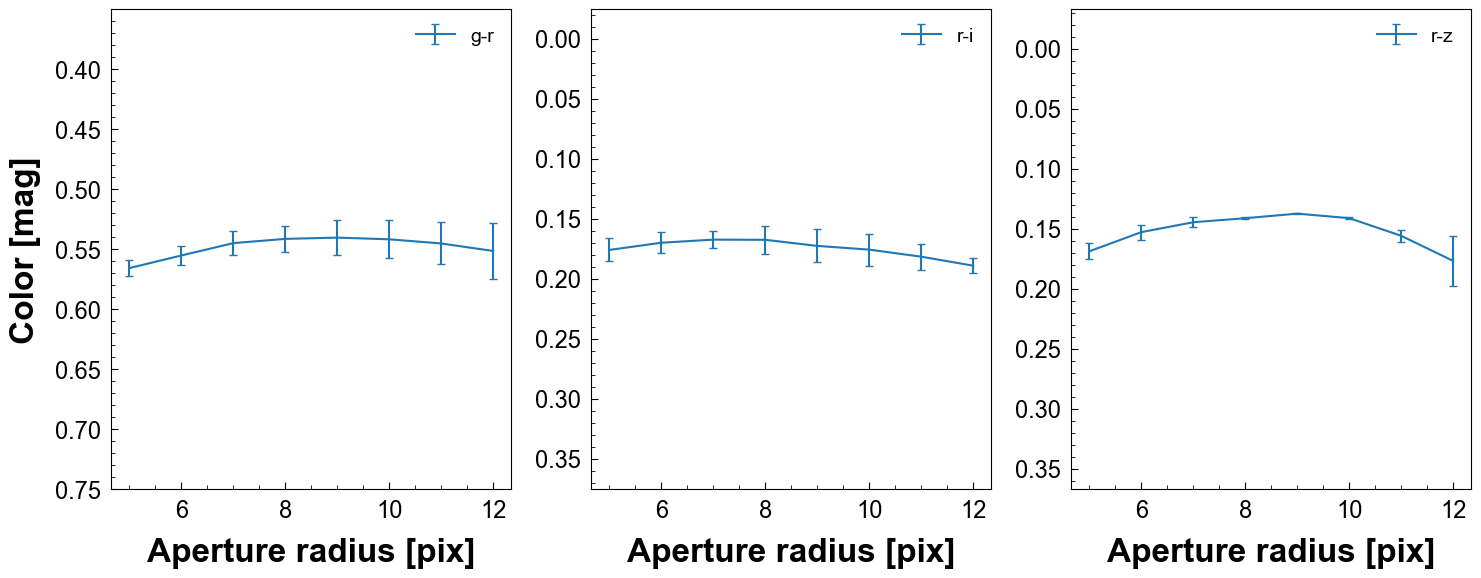

In [26]:
# Popescu
## Check rad vs. color
rad_list = [5, 6, 7, 8, 9, 10, 11, 12]
df_col_P = rad_col(df_P, df_magzpt_120, rad_list, width=0.4)
df_col_P["obj"] = "Popescu"
out = "/Users/beniyama/research/Seimei_3I/paper/data/col_Popescu_20250715.txt"
df_col_P.to_csv(out, sep=" ", index=False)
 
g_r_list, g_rerr_list, r_i_list, r_ierr_list, r_z_list, r_zerr_list = calc_col(df_P, df_magzpt_120, rad_tar)

# Calculate median and std
g_r, g_rerr = np.median(g_r_list), np.std(g_r_list)
r_i, r_ierr = np.median(r_i_list), np.std(r_i_list)
r_z, r_zerr = np.median(r_z_list), np.std(r_z_list)

print(f"rad = {rad_tar}")
print(f" g-r = {g_r:.3f}+-{g_rerr:.3f}")
print(f" r-i = {r_i:.3f}+-{r_ierr:.3f}")
print(f" r-z = {r_z:.3f}+-{r_zerr:.3f}")

rad = 5
 g-r = 0.615+-0.030
 r-i = 0.222+-0.030
 r-z = 0.345+-0.029

rad = 6
 g-r = 0.601+-0.031
 r-i = 0.210+-0.031
 r-z = 0.325+-0.036

rad = 7
 g-r = 0.589+-0.032
 r-i = 0.201+-0.032
 r-z = 0.305+-0.043

rad = 8
 g-r = 0.581+-0.032
 r-i = 0.201+-0.036
 r-z = 0.280+-0.051

rad = 9
 g-r = 0.578+-0.034
 r-i = 0.199+-0.044
 r-z = 0.261+-0.063

rad = 10
 g-r = 0.574+-0.037
 r-i = 0.196+-0.047
 r-z = 0.254+-0.081

rad = 11
 g-r = 0.571+-0.039
 r-i = 0.192+-0.056
 r-z = 0.251+-0.099

rad = 12
 g-r = 0.569+-0.041
 r-i = 0.193+-0.066
 r-z = 0.246+-0.129

rad = 6
 g-r = 0.60+-0.03
 r-i = 0.21+-0.03
 r-z = 0.33+-0.04


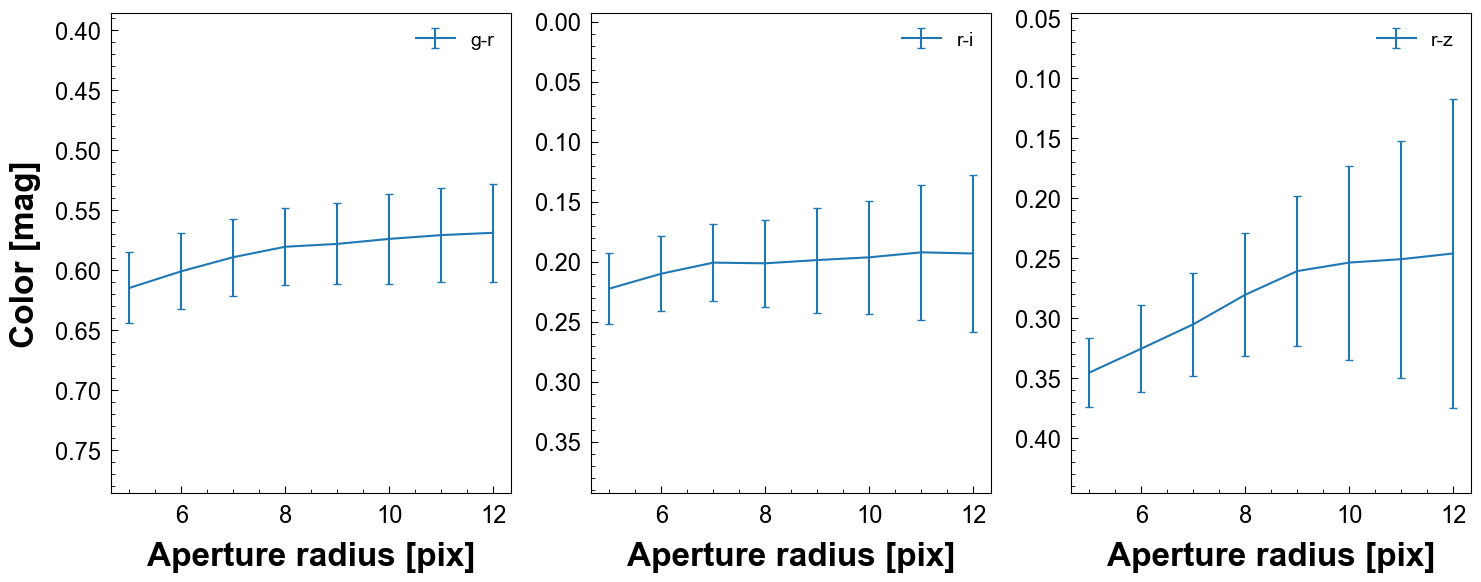

In [27]:
# 3I
## Check rad vs. color
rad_list = [5, 6, 7, 8, 9, 10, 11, 12]
df_col_3I = rad_col(df_3I, df_magzpt_600, rad_list, width=0.4)
df_col_3I["obj"] = "3I"
out = "/Users/beniyama/research/Seimei_3I/paper/data/col_3I_20250715.txt"
df_col_3I.to_csv(out, sep=" ", index=False)


g_r_list, g_rerr_list, r_i_list, r_ierr_list, r_z_list, r_zerr_list = calc_col(df_3I, df_magzpt_600, rad_tar)

# Calculate median and std
g_r, g_rerr = np.median(g_r_list), np.std(g_r_list)
r_i, r_ierr = np.median(r_i_list), np.std(r_i_list)
r_z, r_zerr = np.median(r_z_list), np.std(r_z_list)

print(f"rad = {rad_tar}")
print(f" g-r = {g_r:.2f}+-{g_rerr:.2f}")
print(f" r-i = {r_i:.2f}+-{r_ierr:.2f}")
print(f" r-z = {r_z:.2f}+-{r_zerr:.2f}")

/var/folders/xv/z4qp4sf50z10cwc8tgxysssw0000gn/T/ipykernel_93388/1462146051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mag_cor"] = 0.0
/var/folders/xv/z4qp4sf50z10cwc8tgxysssw0000gn/T/ipykernel_93388/1462146051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["magerr_cor"] = 0.0


rad = 5
 g-r = 0.602+-0.034
 r-i = 0.226+-0.013
 r-z = 0.356+-0.000

rad = 6
 g-r = 0.597+-0.032
 r-i = 0.219+-0.021
 r-z = 0.345+-0.000

rad = 7
 g-r = 0.586+-0.034
 r-i = 0.218+-0.027
 r-z = 0.330+-0.000

rad = 8
 g-r = 0.577+-0.034
 r-i = 0.213+-0.033
 r-z = 0.310+-0.000

rad = 9
 g-r = 0.578+-0.030
 r-i = 0.203+-0.038
 r-z = 0.301+-0.000

rad = 10
 g-r = 0.576+-0.033
 r-i = 0.192+-0.042
 r-z = 0.313+-0.000

rad = 11
 g-r = 0.571+-0.027
 r-i = 0.176+-0.048
 r-z = 0.329+-0.000

rad = 12
 g-r = 0.576+-0.021
 r-i = 0.167+-0.057
 r-z = 0.370+-0.000

rad = 6
 g-r = 0.60+-0.03
 r-i = 0.22+-0.02
 r-z = 0.34+-0.00


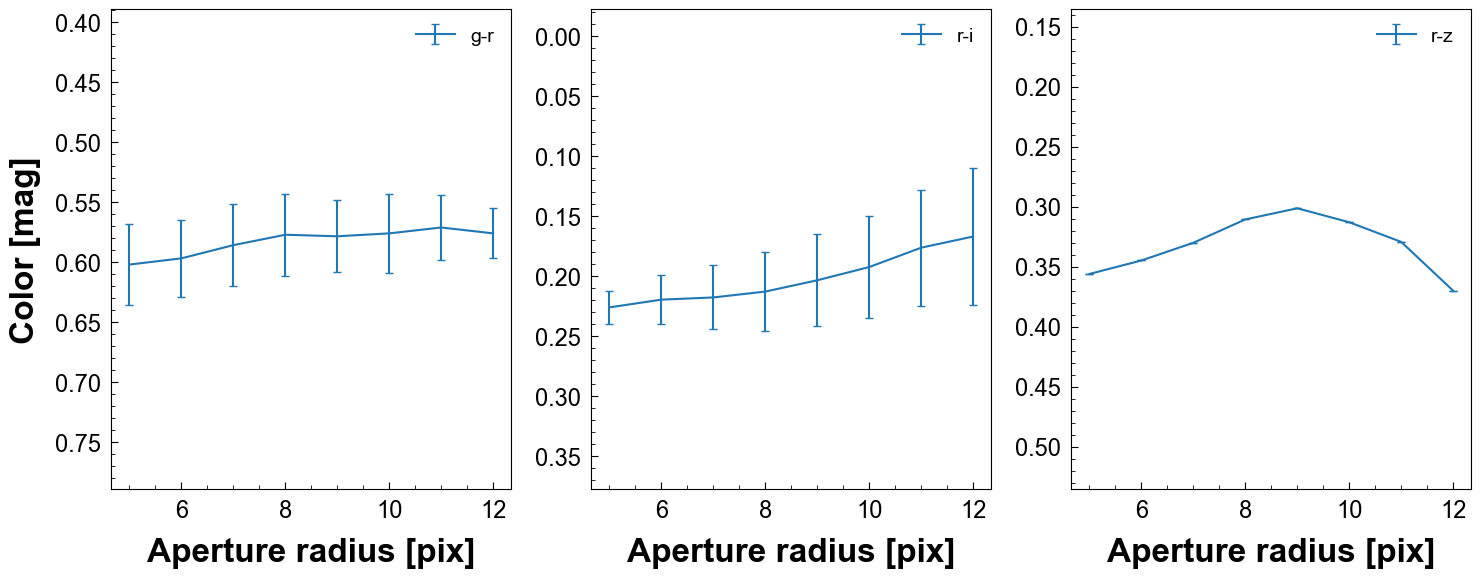

In [28]:
# 3I, selected, clean
rad_list = [5, 6, 7, 8, 9, 10, 11, 12]
frames_clean = ["gri1", "gri4", "gri5", "grz5"]
df_3I_select_clean = df_3I[df_3I["frameid"].isin(frames_clean)]

## Check rad vs. color
rad_list = [5, 6, 7, 8, 9, 10, 11, 12]
rad_col(df_3I_select_clean, df_magzpt_600, rad_list, width=0.4)


g_r_list, g_rerr_list, r_i_list, r_ierr_list, r_z_list, r_zerr_list = calc_col(df_3I_select_clean, df_magzpt_600, rad_tar)

# Calculate median and std
g_r, g_rerr = np.median(g_r_list), np.std(g_r_list)
r_i, r_ierr = np.median(r_i_list), np.std(r_i_list)
r_z, r_zerr = np.median(r_z_list), np.std(r_z_list)

print(f"rad = {rad_tar}")
print(f" g-r = {g_r:.2f}+-{g_rerr:.2f}")
print(f" r-i = {r_i:.2f}+-{r_ierr:.2f}")
print(f" r-z = {r_z:.2f}+-{r_zerr:.2f}")